In [1]:
import pandas as pd 
import numpy as np
import json
import matplotlib.pyplot as plt

In [6]:
conf = json.loads(open("data/Cifar10_IID_5c/config.json", "r").read())
data = [dict(zip(np.array(cli)[:,0], np.array(cli)[:,1])) for cli in conf["Size of samples for labels in clients"]]

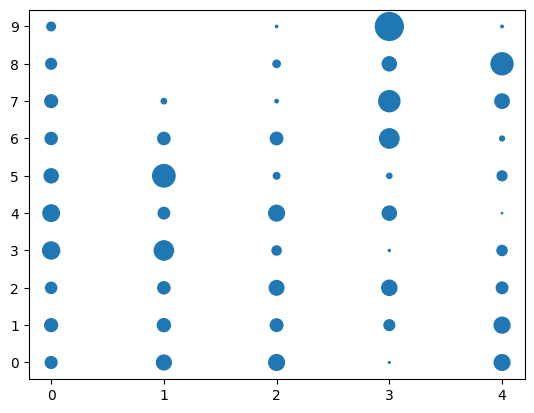

In [8]:
df = pd.DataFrame(data).replace(np.nan, 0)
x = np.array(np.meshgrid(np.arange(5),np.arange(10))).T.reshape(-1,2)[:,0]
y = np.array(np.meshgrid(np.arange(5),np.arange(10))).T.reshape(-1,2)[:,1]
s = df.values.reshape(1,-1)[0].astype("int")
s = (s - np.amin(s))/(np.amax(s) - np.amin(s))*400

plt.scatter(x,y,s)
plt.xticks(np.arange(5))
plt.yticks(np.arange(10))
plt.show()

<Axes: >

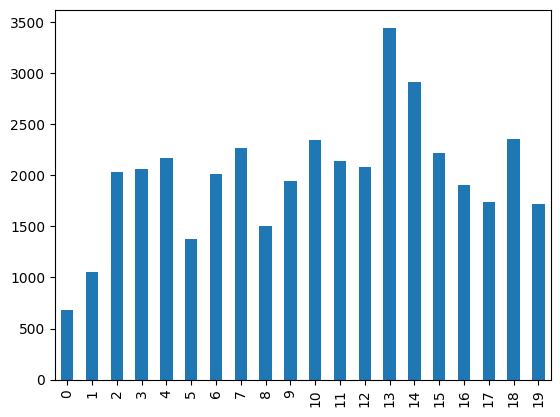

In [146]:
pd.DataFrame(data).sum(axis=1).plot.bar()

In [143]:
import pickle

pickle.load(open("data/Cifar10/server/train.pkl", "rb"))

{'x': array([[[[168, 184, 153],
          [152, 170,  95],
          [196, 215, 201],
          ...,
          [ 64,  75,  46],
          [ 54,  78,   9],
          [ 55,  85,  17]],
 
         [[105, 115,  39],
          [125, 145,  72],
          [192, 211, 192],
          ...,
          [ 69,  79,  46],
          [ 63,  85,  36],
          [ 54,  89,  18]],
 
         [[106, 128,  79],
          [ 98, 109,  62],
          [151, 168, 123],
          ...,
          [ 70,  88,  41],
          [ 63,  81,  47],
          [ 50,  78,  12]],
 
         ...,
 
         [[142, 131, 129],
          [146, 135, 133],
          [143, 132, 128],
          ...,
          [155, 142, 136],
          [157, 148, 143],
          [156, 145, 140]],
 
         [[143, 132, 130],
          [145, 133, 131],
          [142, 131, 127],
          ...,
          [153, 140, 134],
          [155, 146, 141],
          [155, 144, 139]],
 
         [[142, 131, 128],
          [141, 131, 127],
          [142, 131, 126]